In [404]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import random
import statistics
import seaborn as sns 
import collections
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

In [405]:
np.random.seed(0)

In [406]:
X = np.random.normal(0, 5, 10000)

In [407]:
epsilon = np.random.normal(0, 1, 10000)

In [408]:
beta_0 = 100
beta_1 = 0.3

In [409]:
Y = beta_0 + beta_1*X + epsilon

In [410]:
print("The true population statistics are the following:")
print("standard deviation:", statistics.pstdev(X))
print("mean:", statistics.mean(X))

The true population statistics are the following:
standard deviation: 4.937782840880604
mean: -0.09216860079132909


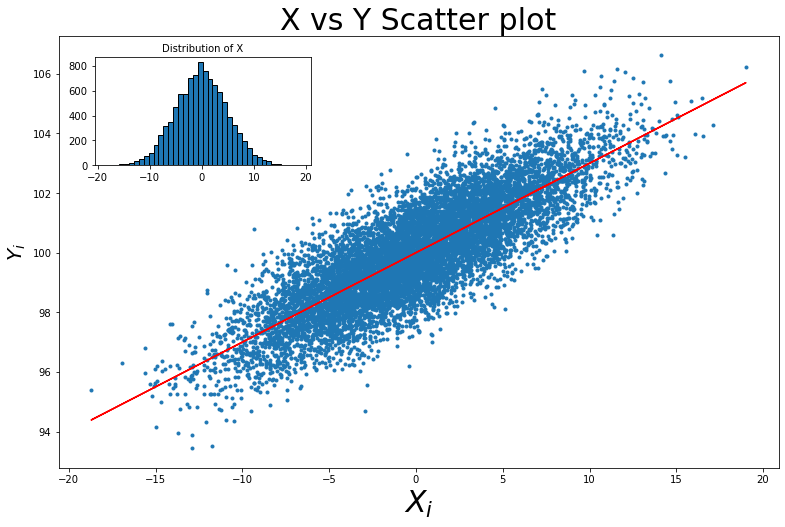

In [411]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.05, 0.7, 0.3, 0.25])


ax.scatter(X, Y, marker=".")
ax.plot(X, beta_0 + beta_1*X, color="red")
ax2.hist(X, bins=40, ec="black")


ax.set_xlabel("$X_i$", fontsize=30, fontweight="bold")
ax.set_ylabel("$Y_i$", fontsize=20, fontweight="bold")
ax.set_title('X vs Y Scatter plot', fontsize=30)

ax2.set_title('Distribution of X', fontsize=10)

plt.show()

In [412]:
xy_observation = np.array([X.tolist(), Y.tolist()])

In [413]:
xy_observation = xy_observation.transpose()

In [414]:
xy_observation

array([[  8.82026173, 102.44396149],
       [  2.00078604,  99.76700481],
       [  4.89368992, 103.20170722],
       ...,
       [  2.58436089, 100.71804902],
       [ -0.16460347,  98.8916877 ],
       [  6.49055716, 101.62063871]])

In [415]:
len(xy_observation)

10000

In [416]:
beta_0_hat_list = []
beta_1_hat_list = []

for i in range(5000):
    inx = np.random.randint(10000, size=100)
    sample = xy_observation[inx]
    sample = sm.add_constant(sample)
    
    sample_results = sm.OLS(sample[:,2], sample[:,0:2]).fit()
    beta_0_hat = sample_results.params[0]
    beta_1_hat = sample_results.params[1]
    
    beta_0_hat_list.append(beta_0_hat)
    beta_1_hat_list.append(beta_1_hat)
    

In [286]:
for i in range(3):
    inx = np.random.randint(100, size=10)
    print(np.mean(inx))

45.6
65.1
54.8


In [287]:
statistics.pvariance(beta_1_hat_list)

0.0004246776311361781

In [288]:
epsilon

array([-0.20211703, -0.833231  ,  1.73360025, ..., -0.05725925,
       -1.05893126, -0.32652844])

In [289]:
np.mean(epsilon**2)/(100*statistics.pvariance(X))

0.00040451582973906824

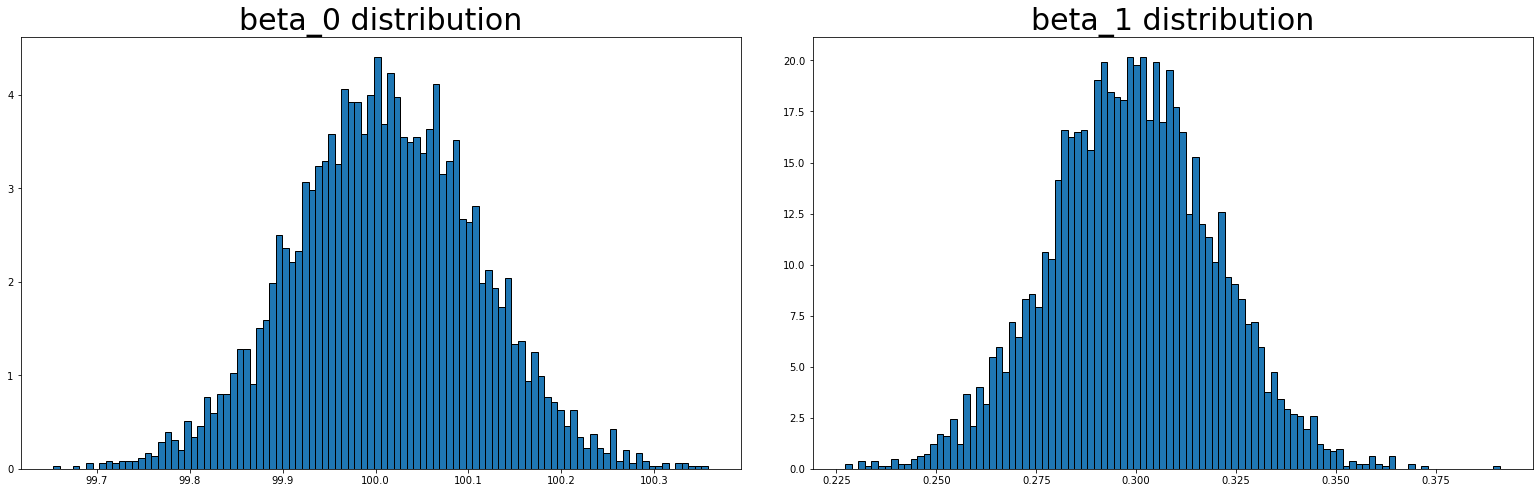

In [290]:
fig = plt.figure(figsize=(10,6))
ax_1 = fig.add_axes([0,0,1,1])
ax_2 = fig.add_axes([1.1, 0, 1, 1])


ax_1.hist(beta_0_hat_list, bins=100, ec="black", density=True)
ax_2.hist(beta_1_hat_list, bins=100, ec="black", density=True)

ax_1.set_title("beta_0 distribution", fontsize=30)
ax_2.set_title("beta_1 distribution", fontsize=30)

plt.show()

In [291]:
def chi_square_dist(df):
    z_dist_list = []
    for i in range(df):
        z_squared = np.square(np.random.normal(0,1,8000))
        z_dist_list.append(z_squared)
    
    return np.sum(np.array(z_dist_list), axis=0) 

#This is an alternative of getting chisquare distribution.
#np.random.chisquare(df,size)

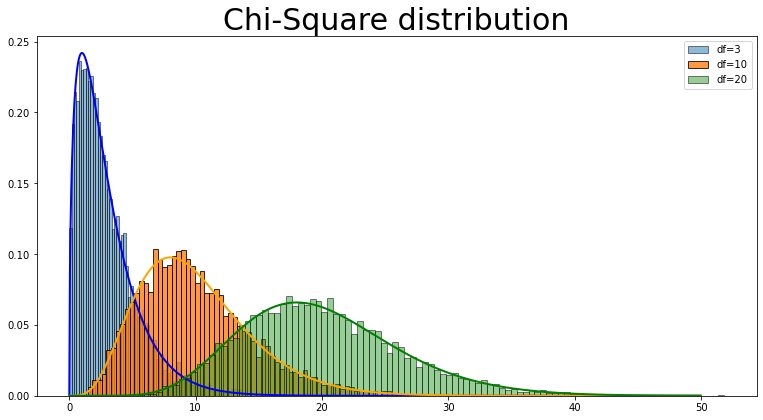

In [292]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 50, .05)

ax_1.hist(chi_square_dist(3), bins=100, ec="black", label="df=3", alpha=0.5, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=3), color='blue', lw=2)


ax_1.hist(chi_square_dist(10), bins=100, ec="black", label="df=10", alpha=0.8, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=10), color='orange', lw=2)

ax_1.hist(chi_square_dist(20), bins=100, ec="black", label="df=20", alpha=0.5, density=True)
ax_1.plot(x, stats.chi2.pdf(x, df=20), color='green', lw=2)


ax_1.set_title("Chi-Square distribution", fontsize=30)


plt.legend()
plt.show()

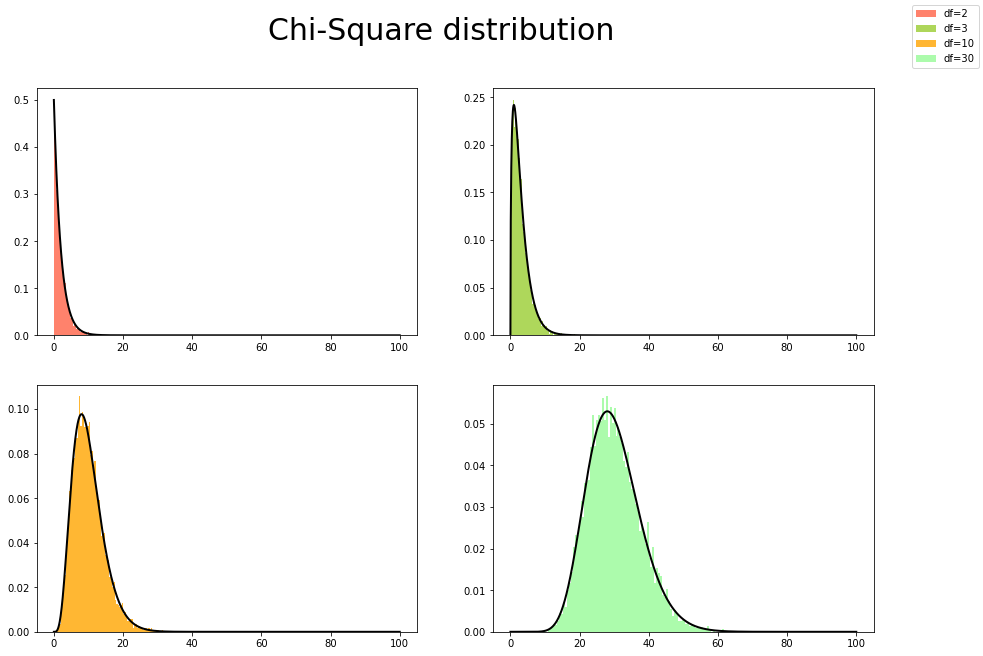

In [293]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

x = np.arange(0, 100, .05)

axes[0,0].hist(chi_square_dist(2), bins=100, label="df=2", color="tomato", alpha=0.8, density=True)
axes[0,0].plot(x, stats.chi2.pdf(x, df=2), color='black', lw=2)

axes[0,1].hist(chi_square_dist(3), bins=100, label="df=3", color="yellowgreen", alpha=0.8, density=True)
axes[0,1].plot(x, stats.chi2.pdf(x, df=3), color='black', lw=2)

axes[1,0].hist(chi_square_dist(10), bins=100, label="df=10", color="orange", alpha=0.8, density=True)
axes[1,0].plot(x, stats.chi2.pdf(x, df=10), color='black', lw=2)

axes[1,1].hist(chi_square_dist(30), bins=100, label="df=30", color="palegreen", alpha=0.8, density=True)
axes[1,1].plot(x, stats.chi2.pdf(x, df=30), color='black', lw=2)


plt.suptitle("Chi-Square distribution", fontsize=30)

figure.legend()
plt.show()

In [294]:
def f_dist(df1, df2):
    numerator = chi_square_dist(df1)/df1 
    denominator = chi_square_dist(df2)/df2
    
    f_dist = numerator / denominator 
    
    return f_dist

# This is an alternative of getting f-distribution.
#np.random.f(df_num,df_denom,size)

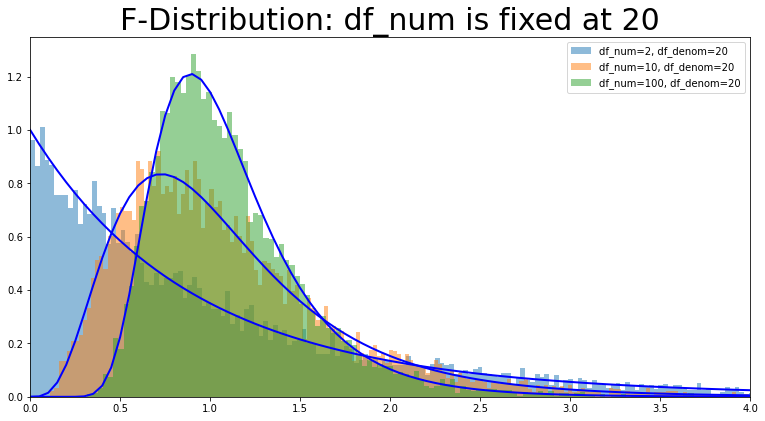

In [295]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 100, .05)

ax_1.hist(f_dist(2,20), bins=500, label="df_num=2, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 2, 20), color='blue', lw=2)

ax_1.hist(f_dist(10,20), bins=300, label="df_num=10, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 10, 20), color='blue', lw=2)

ax_1.hist(f_dist(100,20), bins=200, label="df_num=100, df_denom=20", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 100, 20), color='blue', lw=2)


plt.xlim(0,4)

ax_1.set_title("F-Distribution: df_num is fixed at 20", fontsize=30)


plt.legend()
plt.show()

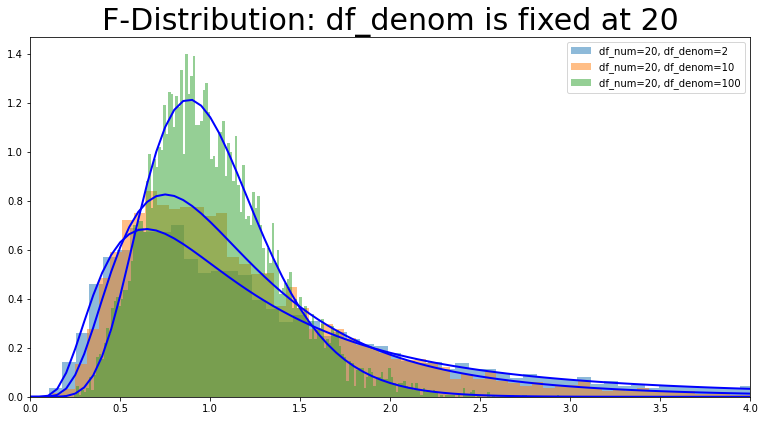

In [296]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 100, .05)

ax_1.hist(f_dist(20,5), bins=1000, label="df_num=20, df_denom=2", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 5), color='blue', lw=2)

ax_1.hist(f_dist(20,10), bins=300, label="df_num=20, df_denom=10", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 10), color='blue', lw=2)

ax_1.hist(f_dist(20,100), bins=200, label="df_num=20, df_denom=100", alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 20, 100), color='blue', lw=2)


plt.xlim(0,4)

ax_1.set_title("F-Distribution: df_denom is fixed at 20", fontsize=30)


plt.legend()
plt.show()

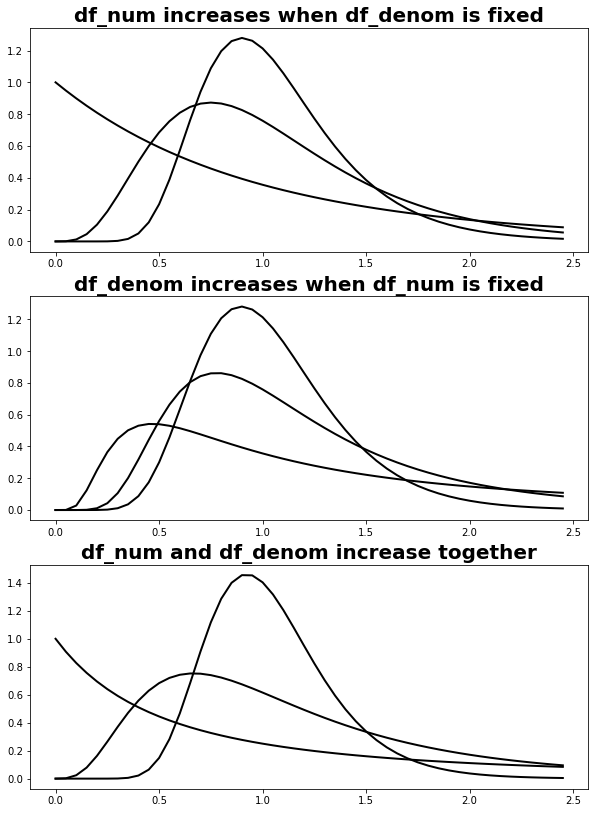

In [297]:
figure, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,14))

x = np.arange(0, 2.5, .05)
v = 30 

# fix df_num
axes[0].plot(x, stats.f.pdf(x,2,v), color='black', lw=2)
axes[0].plot(x, stats.f.pdf(x,10,v), color='black', lw=2)
axes[0].plot(x, stats.f.pdf(x,50,v), color='black', lw=2)
axes[0].set_title("df_num increases when df_denom is fixed", fontsize=20, weight="bold")

# fix df_denom
axes[1].plot(x, stats.f.pdf(x,v,2), color='black', lw=2)
axes[1].plot(x, stats.f.pdf(x,v,10), color='black', lw=2)
axes[1].plot(x, stats.f.pdf(x,v,50), color='black', lw=2)
axes[1].set_title("df_denom increases when df_num is fixed", fontsize=20, weight="bold")


# increase both df_num and df_denom
axes[2].plot(x, stats.f.pdf(x,2,2), color='black', lw=2)
axes[2].plot(x, stats.f.pdf(x,10,10), color='black', lw=2)
axes[2].plot(x, stats.f.pdf(x,50,50), color='black', lw=2)
axes[2].set_title("df_num and df_denom increase together", fontsize=20, weight="bold")

plt.show()

In [298]:
X_1 = np.random.normal(0,1,10000)
X_2 = np.random.normal(0,1,10000)



In [299]:
statistics.variance(X_1)

0.9843315774765472

In [300]:
def calculate_f (df_1, df_2, X_1, X_2):
    sample_1 = np.random.choice(X_1, df_1+1)
    sample_2 = np.random.choice(X_2, df_2+1)
    
    f_stat = statistics.variance(sample_1) / statistics.variance(sample_2)
    
    return f_stat

In [301]:
calculate_f(100,100,X_1,X_2)

0.7936279821804668

In [302]:
F_stat_list = []
for i in range(50000):
    F_statistic = calculate_f(100,100,X_1,X_2)
    F_stat_list.append(F_statistic)

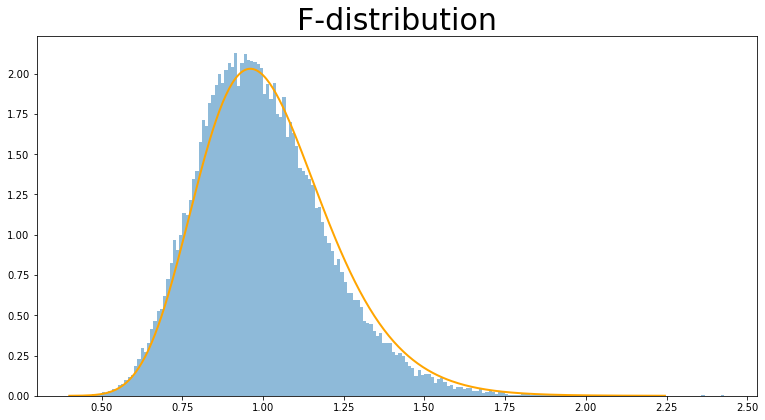

In [303]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0.4, 2.25, .005)

ax_1.hist(F_stat_list, bins=200, alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 100,100), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

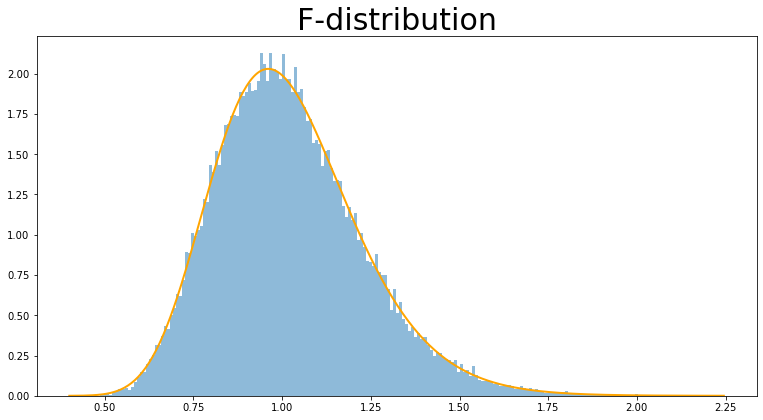

In [304]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0.4, 2.25, .005)

ax_1.hist(np.random.f(100,100,50000), bins=200, alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 100,100), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

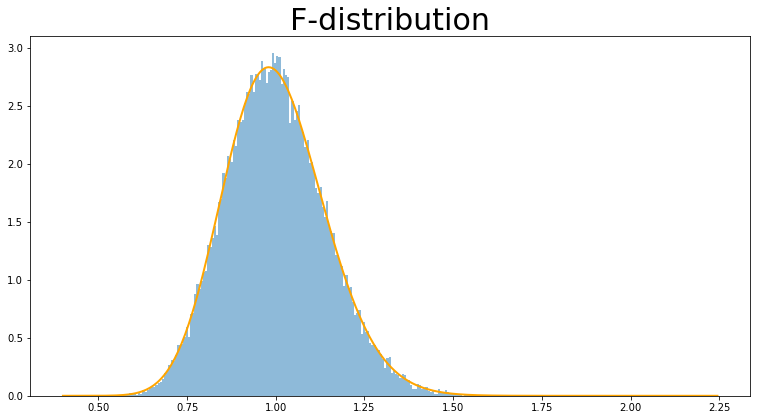

In [305]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0.4, 2.25, .005)

ax_1.hist(np.random.f(100,10000,50000), bins=200, alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, 100,10000), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

In [306]:
X = np.random.normal(0,5,10000)
Y = np.random.normal(0,1,10000)

In [307]:
f_stat_list = []
for i in range(5000):
    sample_X = np.random.choice(X,100)
    sample_Y = np.random.choice(Y,100)
    
    sample_X_var = statistics.variance(sample_X)
    sample_Y_var = statistics.variance(sample_Y)
    
    f_stat = sample_X_var/sample_Y_var
    
    f_stat_list.append(f_stat)

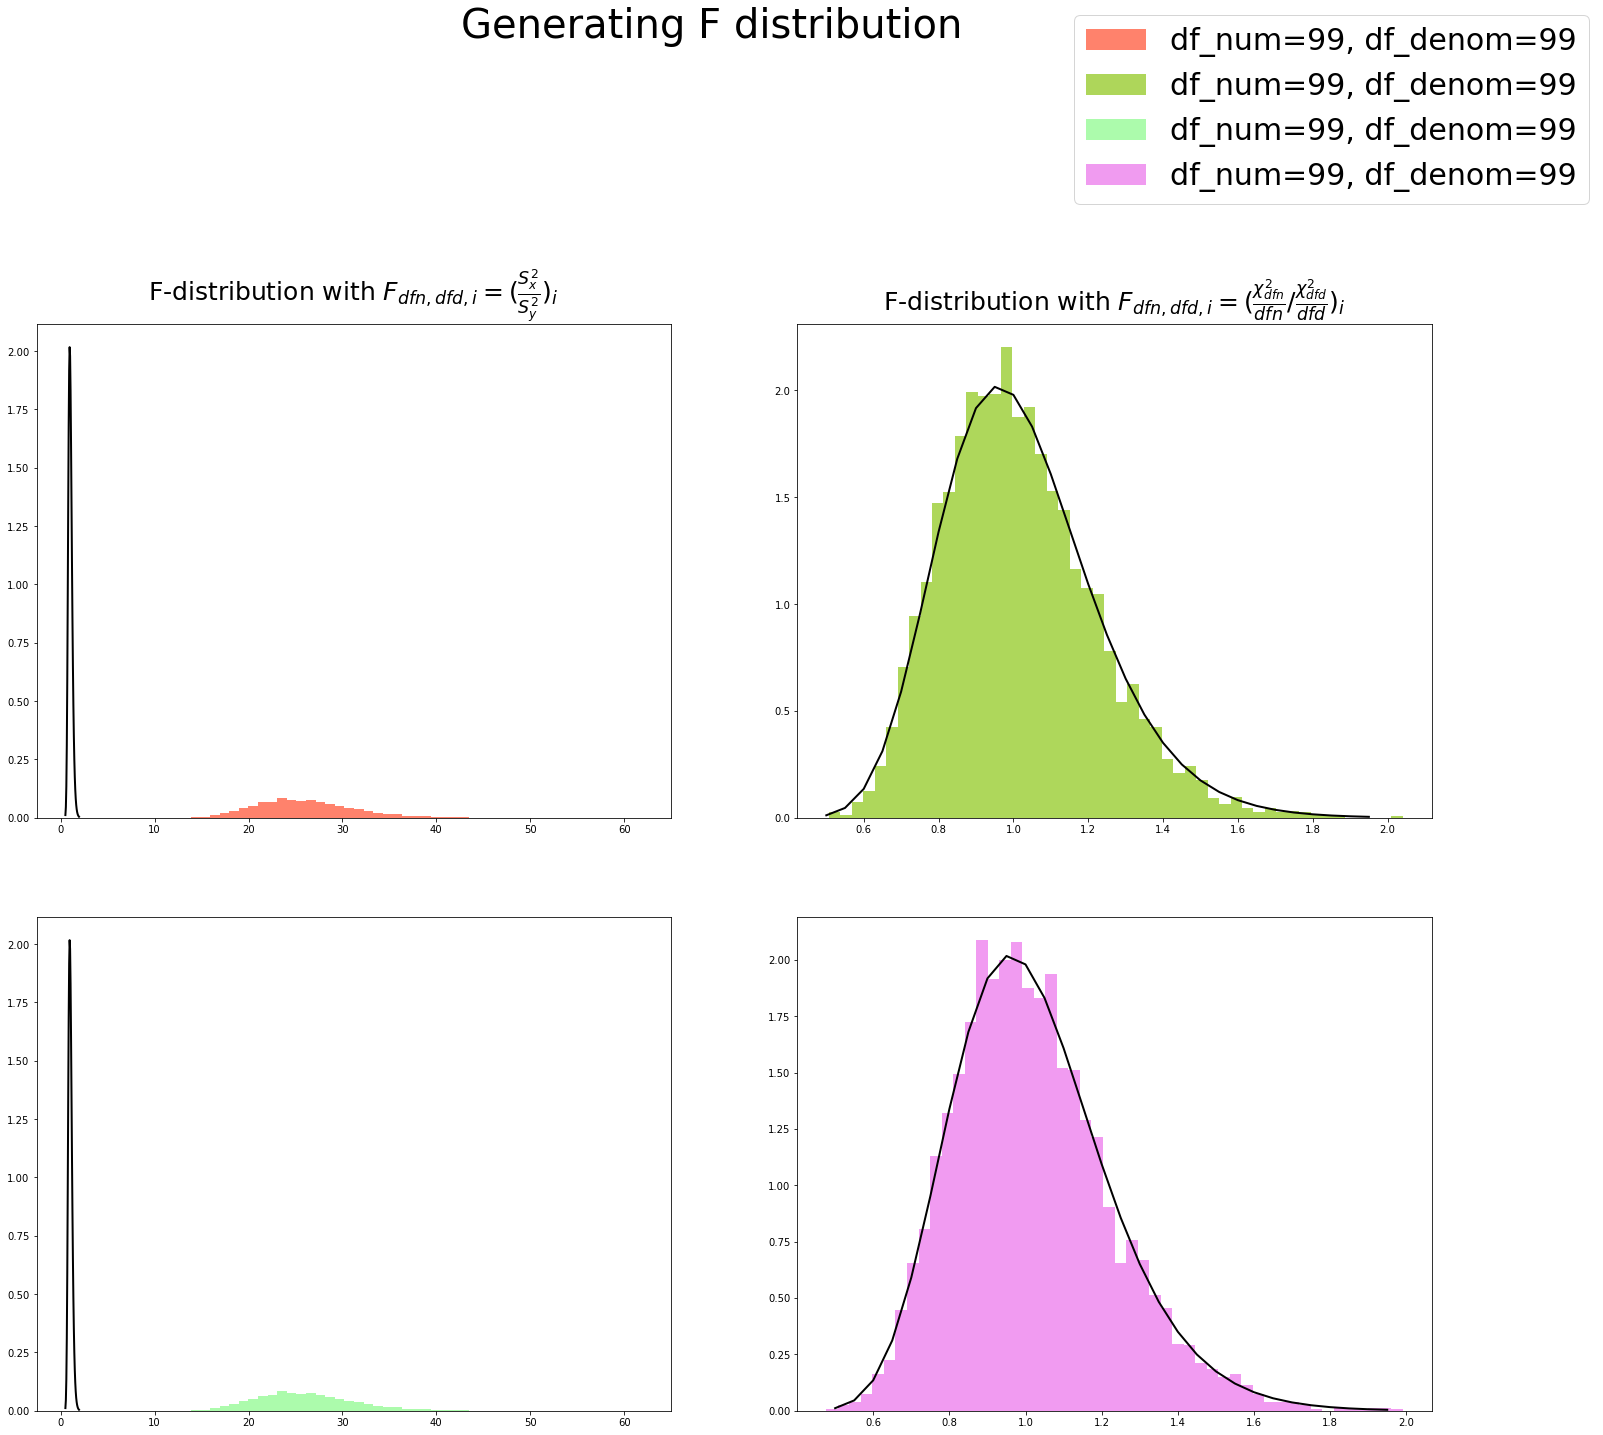

In [308]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,20))

x = np.arange(0.5, 2, .05)

axes[0,0].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{S^2_x}{S^2_y})_i$", fontsize=25)
axes[0,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="tomato", alpha=0.8, density=True)
axes[0,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[0,1].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{\chi^2_{dfn}}{dfn}/\frac{\chi^2_{dfd}}{dfd})_i$", fontsize=25)
axes[0,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="yellowgreen", alpha=0.8, density=True)
axes[0,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="palegreen", alpha=0.8, density=True)
axes[1,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="violet", alpha=0.8, density=True)
axes[1,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

plt.suptitle("Generating F distribution", fontsize=40, y=1.1)


figure.legend(fontsize=30)
plt.show()

Distribution of F-statistic follows F-distribution. Therefore, we can use F-statistic to test hypothesis. 

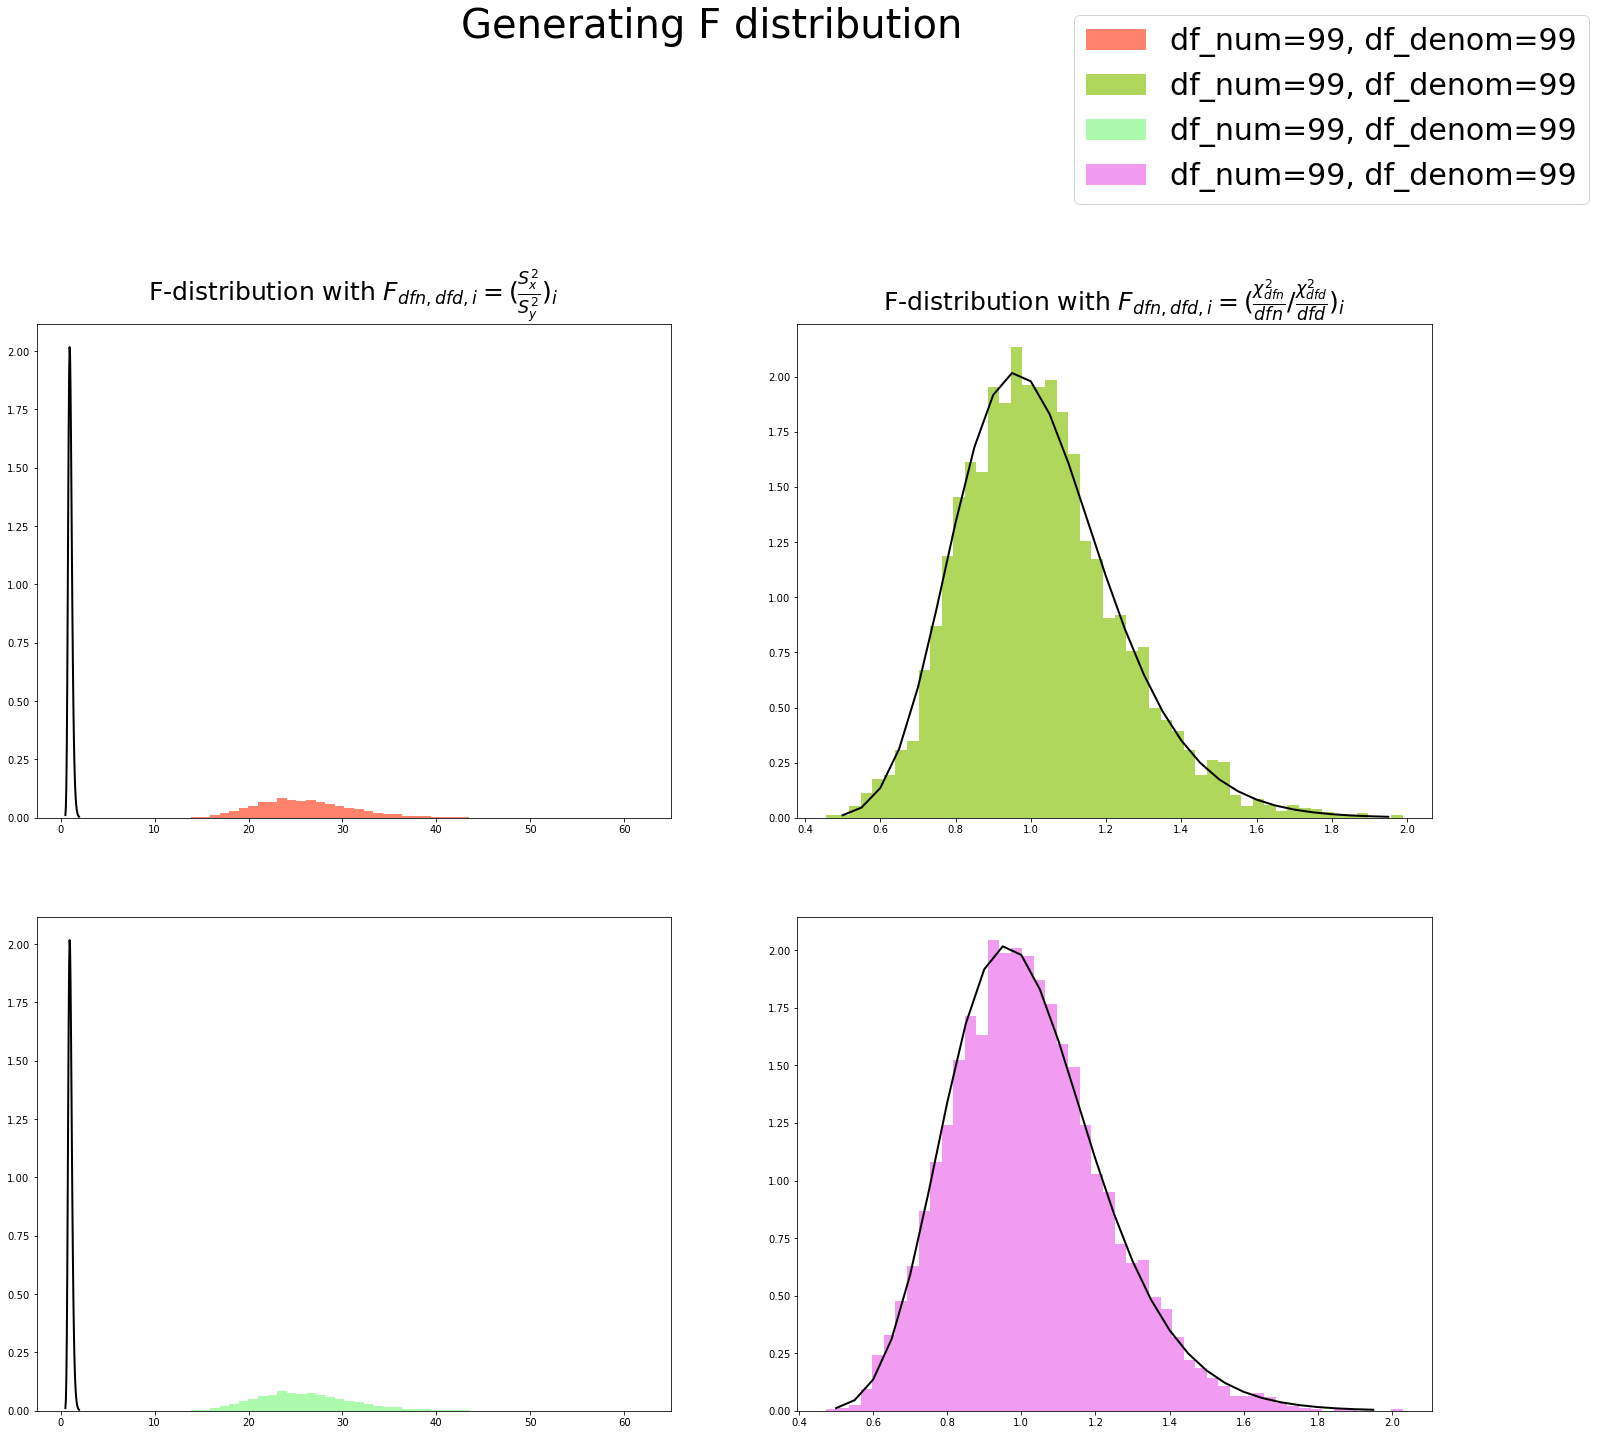

In [309]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,20))

x = np.arange(0.5, 2, .05)

axes[0,0].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{S^2_x}{S^2_y})_i$", fontsize=25)
axes[0,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="tomato", alpha=0.8, density=True)
axes[0,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[0,1].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{\chi^2_{dfn}}{dfn}/\frac{\chi^2_{dfd}}{dfd})_i$", fontsize=25)
axes[0,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="yellowgreen", alpha=0.8, density=True)
axes[0,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="palegreen", alpha=0.8, density=True)
axes[1,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="violet", alpha=0.8, density=True)
axes[1,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

plt.suptitle("Generating F distribution", fontsize=40, y=1.1)


figure.legend(fontsize=30)
plt.show()

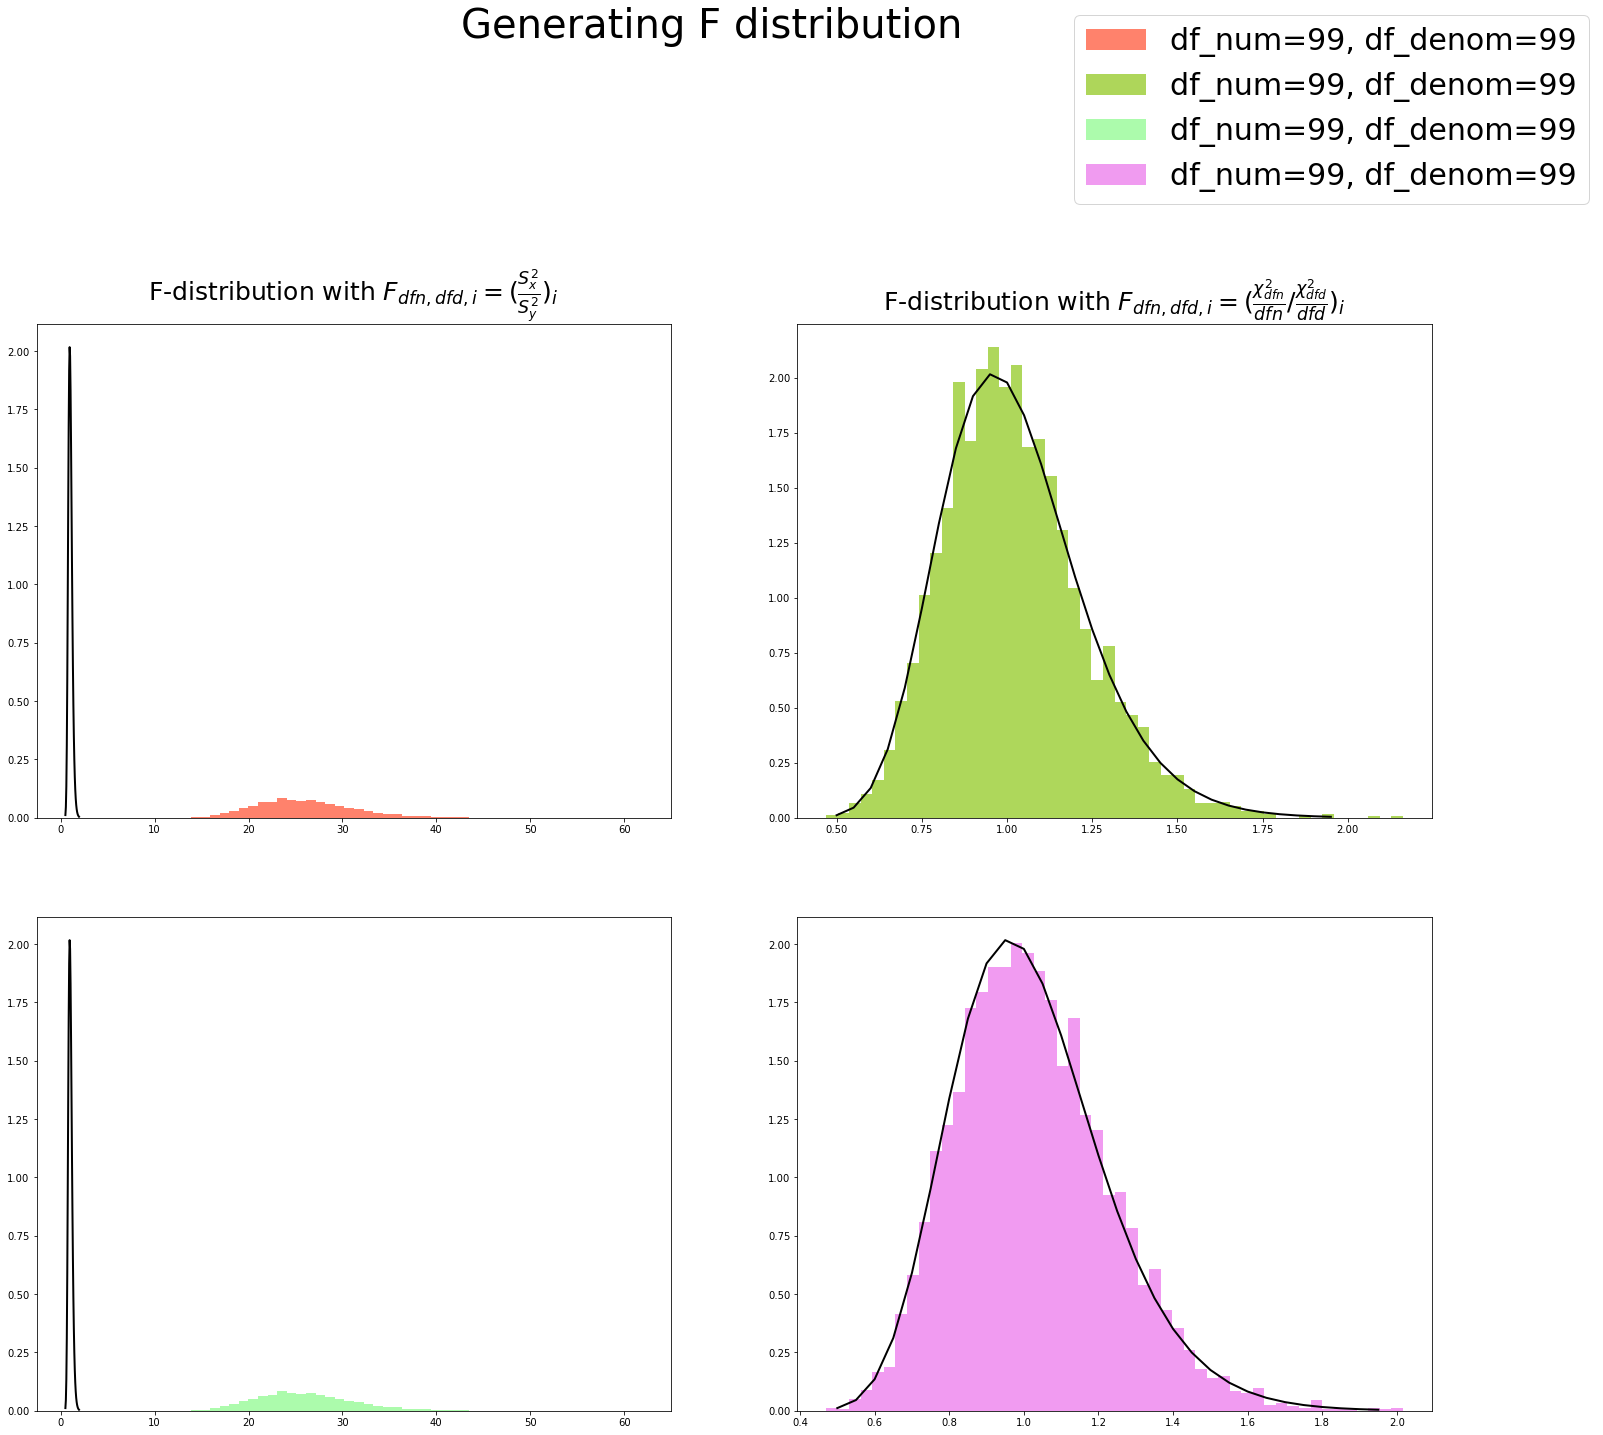

In [310]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,20))

x = np.arange(0.5, 2, .05)

axes[0,0].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{S^2_x}{S^2_y})_i$", fontsize=25)
axes[0,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="tomato", alpha=0.8, density=True)
axes[0,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[0,1].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{\chi^2_{dfn}}{dfn}/\frac{\chi^2_{dfd}}{dfd})_i$", fontsize=25)
axes[0,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="yellowgreen", alpha=0.8, density=True)
axes[0,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=99", color="palegreen", alpha=0.8, density=True)
axes[1,0].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

axes[1,1].hist(np.random.f(99,99,5000), bins=50, label="df_num=99, df_denom=99", color="violet", alpha=0.8, density=True)
axes[1,1].plot(x, stats.f.pdf(x, 99,99), color='black', lw=2)

plt.suptitle("Generating F distribution", fontsize=40, y=1.1)


figure.legend(fontsize=30)
plt.show()

In [311]:
X = np.random.normal(0,1,10000)
Y = np.random.normal(0,1,10000)

f_stat_list = []
for i in range(5000):
    sample_X = np.random.choice(X,100)
    sample_Y = np.random.choice(Y,10)
    
    sample_X_var = statistics.variance(sample_X)
    sample_Y_var = statistics.variance(sample_Y)
    
    f_stat = sample_X_var/sample_Y_var
    
    f_stat_list.append(f_stat)

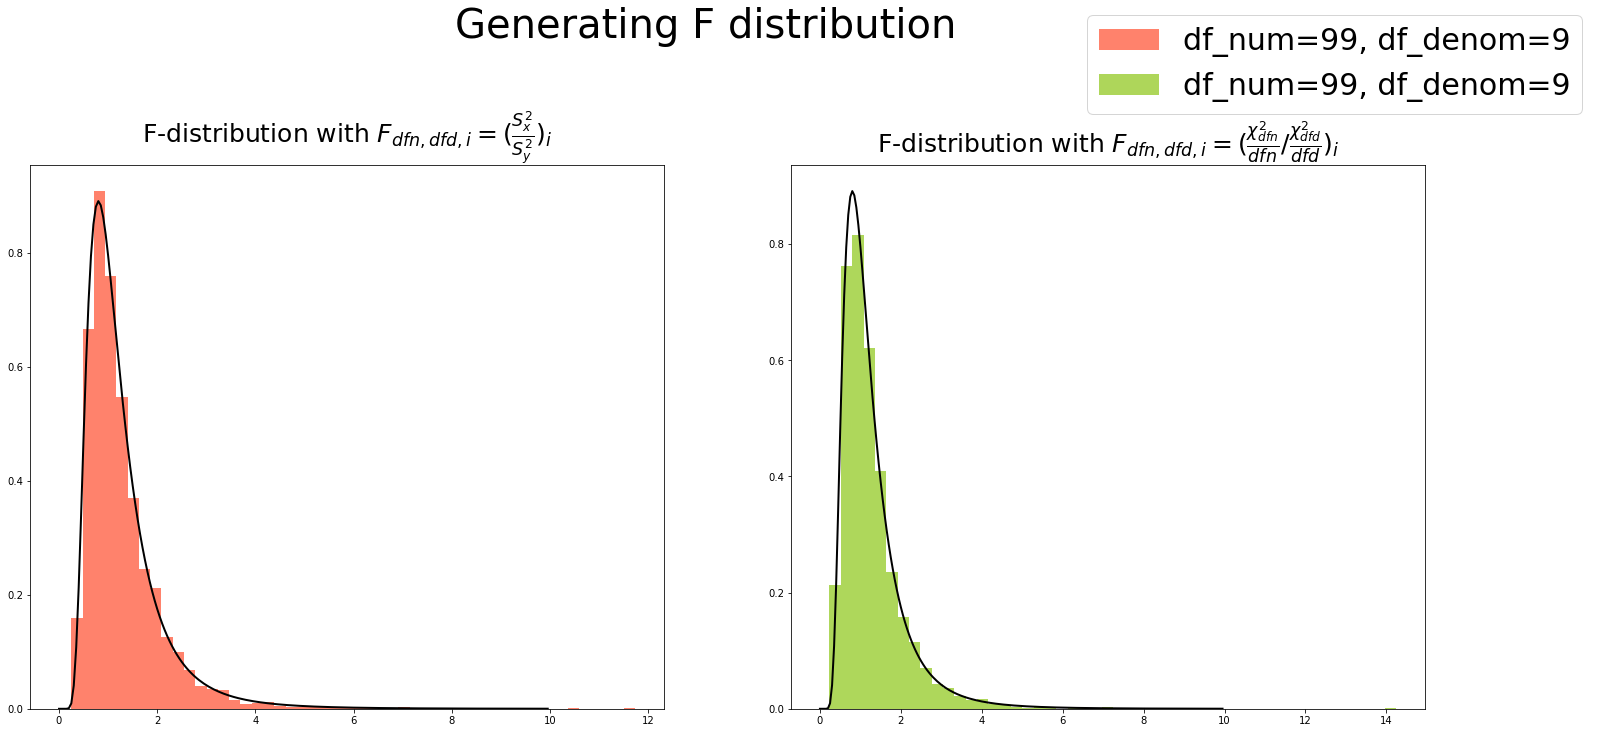

In [312]:
figure, axes = plt.subplots(nrows=1, ncols=2, figsize=(25,10))

x = np.arange(0, 10, .05)

axes[0].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{S^2_x}{S^2_y})_i$", fontsize=25)
axes[0].hist(f_stat_list, bins=50, label="df_num=99, df_denom=9", color="tomato", alpha=0.8, density=True)
axes[0].plot(x, stats.f.pdf(x, 99,9), color='black', lw=2)

axes[1].set_title(r"F-distribution with $F_{dfn,dfd,i} = (\frac{\chi^2_{dfn}}{dfn}/\frac{\chi^2_{dfd}}{dfd})_i$", fontsize=25)
axes[1].hist(np.random.f(99,9,5000), bins=50, label="df_num=99, df_denom=9", color="yellowgreen", alpha=0.8, density=True)
axes[1].plot(x, stats.f.pdf(x, 99,9), color='black', lw=2)

plt.suptitle("Generating F distribution", fontsize=40, y=1.1)


figure.legend(fontsize=30)
plt.show()

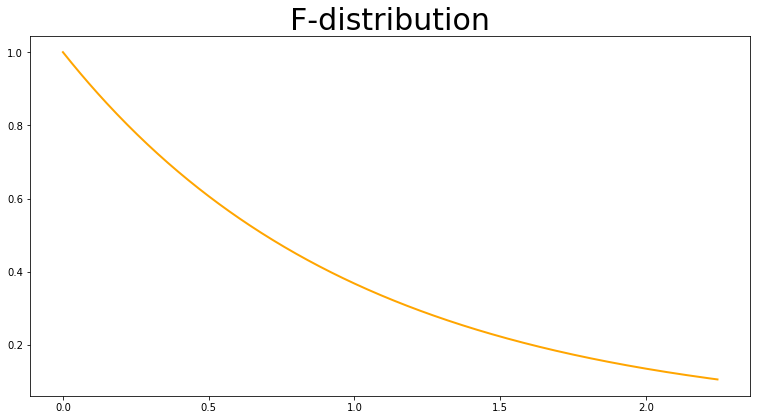

In [313]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 2.25, .005)

ax_1.plot(x, stats.f.pdf(x, 2,10000), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

## Definitions 

**The Unrestricted Model:** This is the model without any of the restriction imposed. It contains all the variables exactly as in the regression of the previous page. 

**The Restricted Model:** This is the model on which the restrictions have been imposed. For examples all regressors whose coefficients have been set to zero are excluded and any other restriction has been imposed. 


$H_O: \beta_1 = \beta_2 = 0$,
$H_A: H_0$ doesn't hold


**Unrestricted Model** 

$Y_i = \alpha + \beta_1X_{1i} + \beta_2X_{2i} + \beta_3X_{3i} + \epsilon_i$

**Restricted Model**

$Y_i = \alpha + \beta_3X_{3i} + \epsilon_i$


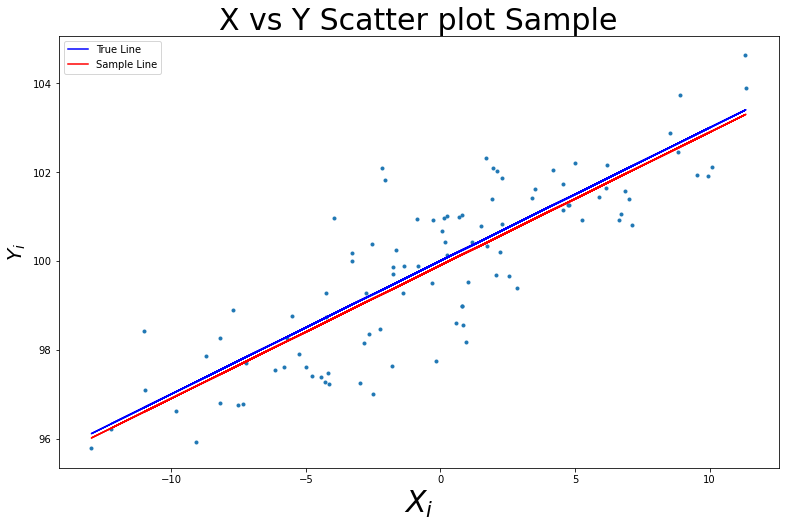

In [314]:
inx = np.random.randint(10000, size=100)

sample_1 = xy_observation[inx]
sample_1 = sm.add_constant(sample_1)


fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(sample_1[:,1], sample_1[:,2], marker=".")
ax.plot(sample_1[:,1], beta_0 + beta_1*sample_1[:,1], linestyle="-", color="blue", label="True Line")


ax.set_xlabel("$X_i$", fontsize=30, fontweight="bold")
ax.set_ylabel("$Y_i$", fontsize=20, fontweight="bold")
ax.set_title('X vs Y Scatter plot Sample', fontsize=30)

sample_results = sm.OLS(sample_1[:,2], sample_1[:,0:2]).fit()
beta_0_hat = sample_results.params[0]
beta_1_hat = sample_results.params[1]

ax.plot(sample_1[:,1], beta_0_hat + beta_1_hat*sample_1[:,1], color="red", label="Sample Line")

ax.legend()

plt.show()

In [332]:
pop_size = 10000

X_1, X_2, X_3 = np.random.normal(50, 10, pop_size), np.random.normal(50, 15, pop_size), np.random.normal(50, 15, pop_size) 

epsilon = np.random.normal(0,4,pop_size)

beta_0 = 10
beta_1 = 2.3
beta_2 = 1.5
beta_3 = 1.9

y = beta_0 + beta_1*X_1 + beta_2*X_2 + beta_3*X_3 + epsilon

X_set_1 = np.column_stack((X_1,X_2,X_3))
X_set_1 = sm.add_constant(X_set_1)

model_1 = sm.OLS(y, X_set_1)
results_1 = model_1.fit()
print(results_1.summary())

X_set_2 = X_3
X_set_2 = sm.add_constant(X_set_2)

model_2 = sm.OLS(y, X_set_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.995e+05
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        18:30:56   Log-Likelihood:                -27922.
No. Observations:               10000   AIC:                         5.585e+04
Df Residuals:                    9996   BIC:                         5.588e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8905      0.273     36.213      0.0

In [333]:
sample_size = 1000
num_restrictions = 2
num_regressors = 3

n = sample_size
q = num_restrictions
k = num_regressors

f_stat_list = []

for i in range(10000):
    idx = np.random.randint(len(X_set_1), size=n)
    Y_sample = y[idx]
    
    X_sample_unrest = X_set_1[idx,:]
    results_unrest = sm.OLS(Y_sample, X_sample_unrest).fit()
    beta_unrest = results_unrest.params 
    ssr_unrest = np.sum(np.square(Y_sample - np.dot(beta_unrest,X_sample_unrest.T)))
    
    ################################################################################
    
    X_sample_rest = X_set_1[:,(0,3)][idx]
    results_rest = sm.OLS(Y_sample, X_sample_rest).fit()
    beta_rest = results_rest.params
    ssr_rest = np.sum(np.square(Y_sample - np.dot(beta_rest,X_sample_rest.T)))
    
    ################################################################################
    
    f_stat = ((ssr_rest-ssr_unrest)/q)/(ssr_unrest/(n-k-1))
    
    f_stat_list.append(f_stat)

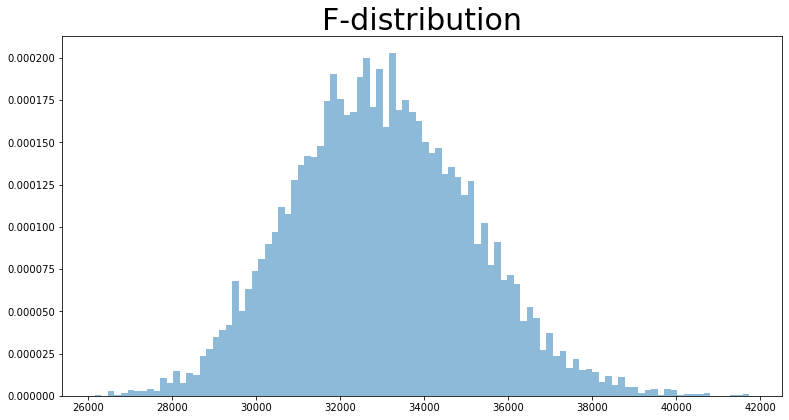

In [334]:
df_num = q
df_denom = (n-k-1)

fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(90, 420, .005)

ax_1.hist(f_stat_list, bins=100, alpha=0.5, density=True)
#ax_1.plot(x, stats.f.pdf(x, df_num, df_denom), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

## This is what I intend to do 

In [378]:
pop_size = 10000

X_1, X_2, X_3 = np.random.normal(50, 10, pop_size), np.random.normal(50, 15, pop_size), np.random.normal(50, 15, pop_size) 

epsilon = np.random.normal(0,4,pop_size)

beta_0 = 10
beta_1 = 0
beta_2 = 0
beta_3 = 1.9

y = beta_0 + beta_1*X_1 + beta_2*X_2 + beta_3*X_3 + epsilon

X_set_1 = np.column_stack((X_1,X_2,X_3))
X_set_1 = sm.add_constant(X_set_1)

model_1 = sm.OLS(y, X_set_1)
results_1 = model_1.fit()
print(results_1.summary())

X_set_2 = X_3
X_set_2 = sm.add_constant(X_set_2)

model_2 = sm.OLS(y, X_set_2)
results_2 = model_2.fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.684e+05
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        20:10:45   Log-Likelihood:                -28000.
No. Observations:               10000   AIC:                         5.601e+04
Df Residuals:                    9996   BIC:                         5.604e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2654      0.277     37.120      0.0

In [366]:
sample_size = 1000
num_restrictions = 2
num_regressors = 3

n = sample_size
q = num_restrictions
k = num_regressors

f_stat_list = []

for i in range(10000):
    idx = np.random.randint(len(X_set_1), size=n)
    Y_sample = y[idx]
    
    X_sample_unrest = X_set_1[idx,:]
    results_unrest = sm.OLS(Y_sample, X_sample_unrest).fit()
    beta_unrest = results_unrest.params 
    ssr_unrest = np.sum(np.square(Y_sample - np.dot(beta_unrest,X_sample_unrest.T)))
    
    ################################################################################
    
    X_sample_rest = X_set_1[:,(0,3)][idx]
    results_rest = sm.OLS(Y_sample, X_sample_rest).fit()
    beta_rest = results_rest.params
    ssr_rest = np.sum(np.square(Y_sample - np.dot(beta_rest,X_sample_rest.T)))
    
    ################################################################################
    
    f_stat = ((ssr_rest-ssr_unrest)/q)/(ssr_unrest/(n-k-1))
    
    f_stat_list.append(f_stat)

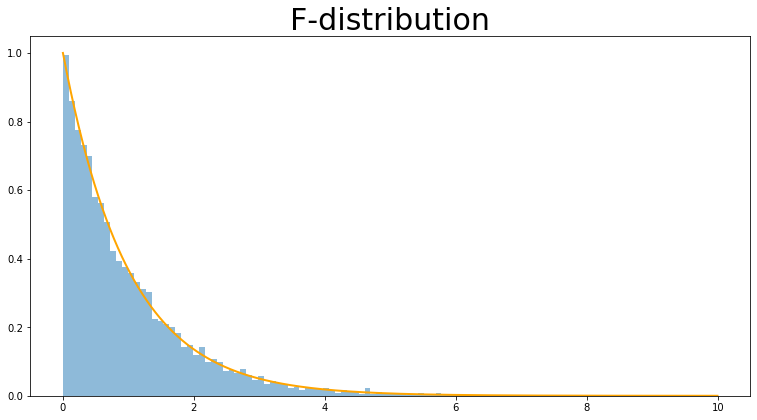

In [367]:
df_num = q
df_denom = (n-k-1)

fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_axes([0,0,1,1])

x = np.arange(0, 10, .005)

ax_1.hist(f_stat_list, bins=100, alpha=0.5, density=True)
ax_1.plot(x, stats.f.pdf(x, df_num, df_denom), color='orange', lw=2)


ax_1.set_title("F-distribution", fontsize=30)

plt.show()

# Okay, now let me test the joint hypothesis with the f-statistic

## Null Hypothesis: beta_1 = beta_2 = 0

### Here, I am generating the hypothetical population.

In [395]:
pop_size = 10000

X_1, X_2, X_3 = np.random.normal(50, 10, pop_size), np.random.normal(50, 15, pop_size), np.random.normal(50, 15, pop_size) 

epsilon = np.random.normal(0,4,pop_size)

beta_0 = 10
beta_1 = 0
beta_2 = 0
beta_3 = 1.9

y = beta_0 + beta_1*X_1 + beta_2*X_2 + beta_3*X_3 + epsilon

X_set_1 = np.column_stack((X_1,X_2,X_3))
X_set_1 = sm.add_constant(X_set_1)

### I am taking a sample with the size of 100 from the population 

In [397]:
idx = np.random.randint(len(X_set_1), size=100)
Y_sample = y[idx]
    
X_sample = X_set_1[idx,:]
sample_results = sm.OLS(Y_sample, X_sample).fit()
print(sample_results.summary())
print()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     1237.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           1.47e-76
Time:                        20:26:24   Log-Likelihood:                -292.72
No. Observations:                 100   AIC:                             593.4
Df Residuals:                      96   BIC:                             603.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5462      2.886      2.268      0.0

### Here is the f-statistic for the Joint-Hypothesis

In [401]:
A = np.identity(len(sample_results.params))
print(A)
print()
A = A[1:3,:]
print(A)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [403]:
print(sample_results.f_test(A))

<F test: F=array([[0.29903399]]), p=0.7422223828763592, df_denom=96, df_num=2>


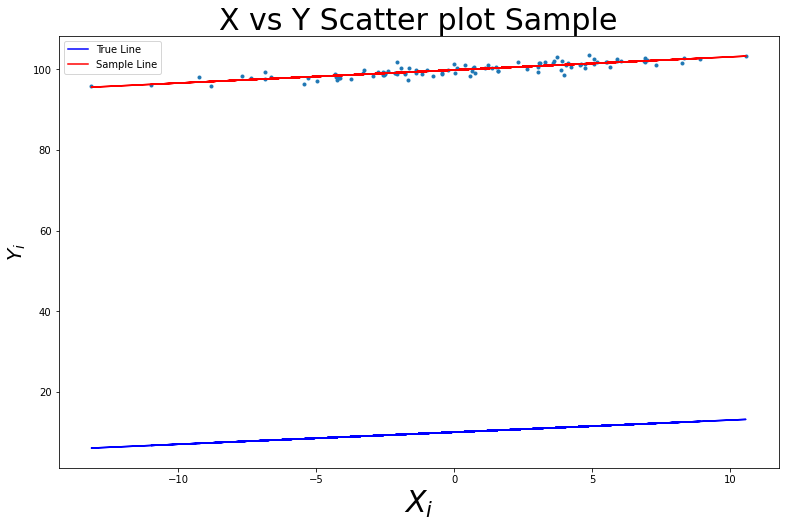

In [271]:
inx = np.random.randint(10000, size=100)

sample_1 = xy_observation[inx]
sample_1 = sm.add_constant(sample_1)


fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0,0,1,1])

ax.scatter(sample_1[:,1], sample_1[:,2], marker=".")
ax.plot(sample_1[:,1], beta_0 + beta_1*sample_1[:,1], linestyle="-", color="blue", label="True Line")


ax.set_xlabel("$X_i$", fontsize=30, fontweight="bold")
ax.set_ylabel("$Y_i$", fontsize=20, fontweight="bold")
ax.set_title('X vs Y Scatter plot Sample', fontsize=30)

sample_results = sm.OLS(sample_1[:,2], sample_1[:,0:2]).fit()
beta_0_hat = sample_results.params[0]
beta_1_hat = sample_results.params[1]

ax.plot(sample_1[:,1], beta_0_hat + beta_1_hat*sample_1[:,1], color="red", label="Sample Line")

ax.legend()

plt.show()

In [272]:
print(sample_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     292.4
Date:                Thu, 01 Apr 2021   Prob (F-statistic):           3.59e-31
Time:                        15:34:08   Log-Likelihood:                -129.01
No. Observations:                 100   AIC:                             262.0
Df Residuals:                      98   BIC:                             267.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.8300      0.089   1120.463      0.0

https://stackoverflow.com/questions/60271520/test-null-hypothesis-that-regression-coefficient-equals-a-nonzero-value-in-stats

### This talks about how to set the null hypothesis equal to nonzero value. 

### Variance of $\widehat{\beta_1}$

$var(\widehat{\beta_1}) = \frac{var(Z_i)}{n \cdot (\sigma_x^2)^2}$

where $Z_i = (X_{ij} - \mu_x)\cdot \epsilon_{ij}$





### Variance of $\widehat{\beta_1}$

$var(\widehat{\beta_1}) = \frac{var(Z_i)}{n \cdot (\sigma_x^2)^2}$

where $Z_i = (X_{ij} - \mu_x)\cdot \epsilon_{ij}$


$\widehat{var(\beta_{ols})} = \frac{\widehat{var(z_i)}}{n \cdot (s_x^2)^2}$

where $Z_j = (X_{j} - \bar{X})\cdot e_{j}$


where $\widehat{var(z_i)} = $